In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn  as sns

df = pd.read_csv('./data_set/pima-indians-diabetes3.csv')

In [3]:
df.head(5)

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df['diabetes'].value_counts()

diabetes
0    500
1    268
Name: count, dtype: int64

In [5]:
df.describe()

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
#상관관계 분석
df.corr()

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
pregnant,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
plasma,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
pressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedigree,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


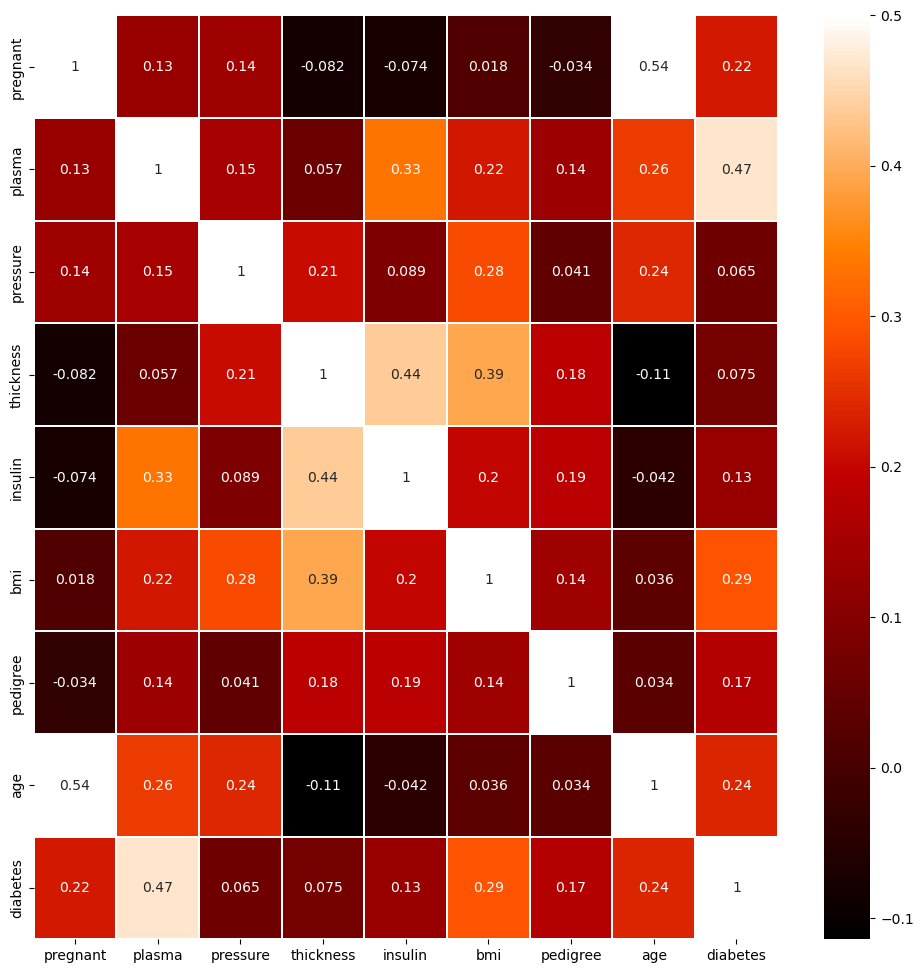

In [7]:
#상관관계를 더 보기쉽게 히트맵으로
color_map = plt.cm.gist_heat
plt.figure(figsize=(12,12))

sns.heatmap(df.corr(), linewidths=0.1, vmax=0.5, cmap=color_map, linecolor='white', annot=True)
plt.show()

### 데이터 추출하기

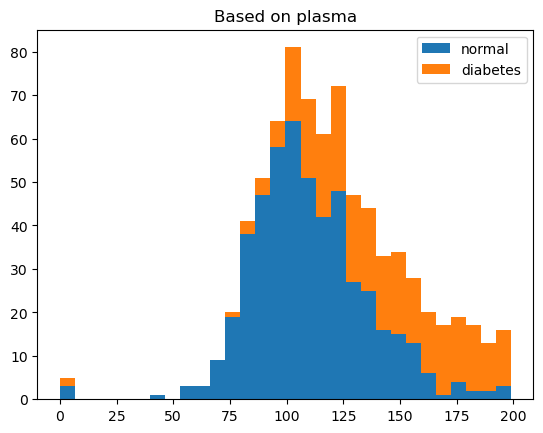

In [12]:
#plasma를 기준으로 정상과 당뇨의 분포비율 확인
plt.hist(x=[df.plasma[df.diabetes == 0], df.plasma[df.diabetes==1]], bins=30, histtype='barstacked', label=['normal','diabetes'])
plt.title('Based on plasma')
plt.legend()

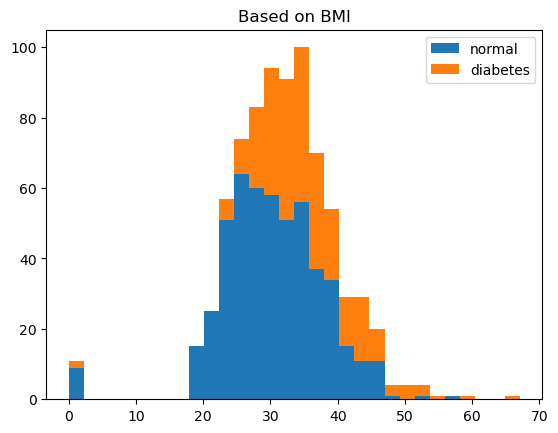

In [11]:
# BMI를 기준으로 정상과 당뇨의 분포 비율 확인
plt.hist(x=[df.bmi[df.diabetes==0], df.bmi[df.diabetes==1]], bins=30, histtype='barstacked', label=['normal','diabetes'])
plt.title('Based on BMI')
plt.legend()

### 당뇨병 예측 실행

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

#데이터셋 불러오기(나중에 예측만 할때는 주석 해제 후 사용)
#import pandas as pd
#df = pd.read_csv('./data_set/pima-indians-diabetes3.csv')

#타겟하는 diabetes가 가장 마지막 열이기떄문에, X는 마지막 열 제외, y는 마지막 열만 할당
X = df.iloc[:, : -1]
y = df.iloc[:, -1]

In [19]:
X

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [20]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: diabetes, Length: 768, dtype: int64

In [ ]:
#input_dim을 알기위해 길이계산
#피처의 개수를 input_dim에 넣어줘야한다.
len(X.columns)


8

In [24]:
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu', name='Dense1'))
#첫번째만 input_dim으로 입력해주면, 나머지 층들은 알아서 내부적으로 계산
model.add(Dense(8, activation='relu', name='Dense2'))
model.add(Dense(1, activation='sigmoid', name='Dense3'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense1 (Dense)              (None, 12)                108       
                                                                 
 Dense2 (Dense)              (None, 8)                 104       
                                                                 
 Dense3 (Dense)              (None, 1)                 9         
                                                                 
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


In [25]:
#모델 컴파일
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#모델 실행
history = model.fit(X, y, epochs=100, batch_size=5)

Epoch 1/100
154/154 [==============================] - 3s 4ms/step - loss: 2.5130 - accuracy: 0.6380
Epoch 2/100
154/154 [==============================] - 1s 5ms/step - loss: 1.5371 - accuracy: 0.6367
Epoch 3/100
154/154 [==============================] - 1s 4ms/step - loss: 1.1222 - accuracy: 0.6393
Epoch 4/100
154/154 [==============================] - 1s 5ms/step - loss: 0.9253 - accuracy: 0.6185
Epoch 5/100
154/154 [==============================] - 1s 5ms/step - loss: 0.8211 - accuracy: 0.6211
Epoch 6/100
154/154 [==============================] - 1s 5ms/step - loss: 0.7252 - accuracy: 0.6628
Epoch 7/100
154/154 [==============================] - 1s 4ms/step - loss: 0.7624 - accuracy: 0.6445
Epoch 8/100
154/154 [==============================] - 1s 5ms/step - loss: 0.7223 - accuracy: 0.6354
Epoch 9/100
154/154 [==============================] - 1s 4ms/step - loss: 0.7111 - accuracy: 0.6510
Epoch 10/100
154/154 [==============================] - 1s 4ms/step - loss: 0.6825 - accura

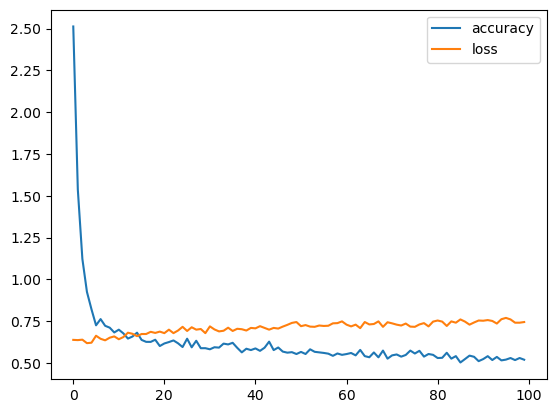

In [ ]:
plt.plot(history.history['loss'])  # 손실 그래프 그리기
plt.plot(history.history['accuracy'])  # 정확도 그래프 그리기
plt.legend(['accuracy','loss'])

In [32]:
print("\n loss: %.4f" % (model.evaluate(X, y)[0]))

24/24 [==============================] - 1s 3ms/step - loss: 0.4847 - accuracy: 0.7734

 loss: 0.4847


In [ ]:
print("\n Accuracy: %.4f" % (model.evaluate(X, y)[1]))

24/24 [==============================] - 0s 10ms/step - loss: 0.4847 - accuracy: 0.7734

 Accuracy: 0.7734
